In [1]:
import pandas as pd
import numpy as np
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import KFold
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise import accuracy
import matplotlib.pyplot as plt


ratings_df = pd.read_csv('data/ratings.csv')

<AxesSubplot:xlabel='rating'>

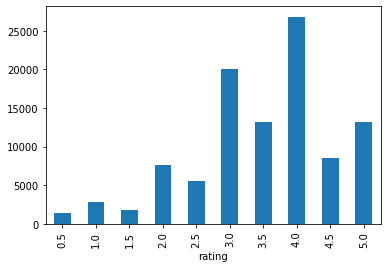

In [2]:
ratings_df.groupby('rating').count()['userId'].plot.bar()

In [3]:
reader = Reader(rating_scale=(1, 5))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
anti_set = data.build_full_trainset().build_anti_testset()

In [4]:
movies = ratings_df[['movieId']].drop_duplicates(['movieId'])
users = ratings_df[['userId']].drop_duplicates(['userId'])
avg_rmse = {}

In [5]:
kf = KFold(n_splits=5)
algo = KNNBasic()
rmse_list = []
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    rmse_list.append(rmse)
avg = np.array(rmse_list).mean()
print(f'\nAvg. RMSE: {avg}')
avg_rmse[algo] = avg

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9438
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9405
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9459
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9521
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9480

Avg. RMSE: 0.9460664742454691


In [6]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine'}
algo = KNNWithMeans(sim_options = sim_options)
rmse_list = []
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    rmse_list.append(rmse)
avg = np.array(rmse_list).mean()
print(f'\nAvg. RMSE: {avg}')
avg_rmse[algo] = avg

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8980
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9026
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9017
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8993
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9013

Avg. RMSE: 0.900563477668294


In [7]:
kf = KFold(n_splits=5)
sim_options = {'name':'pearson'}
algo = KNNWithMeans(sim_options = sim_options)
rmse_list = []
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    rmse_list.append(rmse)
avg = np.array(rmse_list).mean()
print(f'\nAvg. RMSE: {avg}')
avg_rmse[algo] = avg

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8938
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8952
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8987
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9009
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8986

Avg. RMSE: 0.897412699519804


In [8]:
kf = KFold(n_splits=5)
sim_options = {'name':'pearson'}
algo = KNNBaseline(k=3, sim_options=sim_options)
rmse_list = []
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    rmse_list.append(rmse)
avg = np.array(rmse_list).mean()
print(f'\nAvg. RMSE: {avg}')
avg_rmse[algo] = avg

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9484
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9559
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9592
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9531
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9525

Avg. RMSE: 0.9538180987017497


In [9]:
best_algo = min(avg_rmse, key=avg_rmse.get)

In [11]:
anti_pre = best_algo.test(anti_set)
pred_df = pd.DataFrame(anti_pre).merge(movies, left_on = ['iid'], right_on = ['movieId'])
pred_df = pd.DataFrame(pred_df).merge(users, left_on = ['uid'], right_on = ['userId'])

In [12]:
pred_df

,uid,iid,r_ui,est,details,movieId,userId
0,1,318,3.501557,4.992568,"{'actual_k': 3, 'was_impossible': False}",318,1
1,1,1704,3.501557,5.000000,"{'actual_k': 3, 'was_impossible': False}",1704,1
2,1,6874,3.501557,4.379941,"{'actual_k': 3, 'was_impossible': False}",6874,1
3,1,8798,3.501557,4.491448,"{'actual_k': 3, 'was_impossible': False}",8798,1
4,1,46970,3.501557,3.475756,"{'actual_k': 3, 'was_impossible': False}",46970,1
...,...,...,...,...,...,...,...
5830799,2,3744,3.501557,3.114713,"{'actual_k': 3, 'was_impossible': False}",3744,2
5830800,2,3793,3.501557,4.540334,"{'actual_k': 3, 'was_impossible': False}",3793,2
5830801,2,3809,3.501557,2.786525,"{'actual_k': 3, 'was_impossible': False}",3809,2
5830802,2,4006,3.501557,4.091728,"{'actual_k': 3, 'was_impossible': False}",4006,2
